# Predicting Tomorrow's Closing Price for Any Stock

## Aim: To predict tomorrow's stock price using historical data. 

### Importing Libraries 

In [117]:
!pip install yfinance
import yfinance as yf # YahooFinance for stock data
import pandas as pd #Pandas
import numpy as np #Numpy
from sklearn.metrics import precision_score #Precision score metrics to compare actual vs predicted values
import matplotlib.pyplot as plt

## Data

### Insert Stock Symbol to access Stock Data

In [152]:
def search_stocks():
    symbol=input(str('Please Enter the Stock Symbol')) #Asks user for their Stock Input
    stock_symbol = yf.Ticker(symbol) #Requests the data
    stock_symbol = stock_symbol.history(period="max") #Pulls all the historical data of the stock
    stock_symbol.to_csv("stock_symbol.csv") #converting the retrieved data into csv
    stock_data=pd.read_csv('stock_symbol.csv') 
    return stock_data #returning the data 

In [203]:
stock_data = search_stock()
stock_data

Please Enter the Stock SymbolAMZN


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0
...,...,...,...,...,...,...,...,...
6578,2023-07-07 00:00:00-04:00,128.589996,130.970001,128.130005,129.779999,41928700,0.0,0.0
6579,2023-07-10 00:00:00-04:00,129.070007,129.279999,125.919998,127.129997,61889300,0.0,0.0
6580,2023-07-11 00:00:00-04:00,127.750000,129.770004,127.349998,128.779999,49951500,0.0,0.0
6581,2023-07-12 00:00:00-04:00,130.309998,131.259995,128.830002,130.800003,54022800,0.0,0.0


### Setting index as date-time

In [204]:
stock_data.index = pd.to_datetime(stock_data.Date)
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1997-05-15 00:00:00-04:00,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1997-05-16 00:00:00-04:00,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
1997-05-19 00:00:00-04:00,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
1997-05-20 00:00:00-04:00,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
1997-05-21 00:00:00-04:00,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0


<AxesSubplot:xlabel='Year', ylabel='Price'>

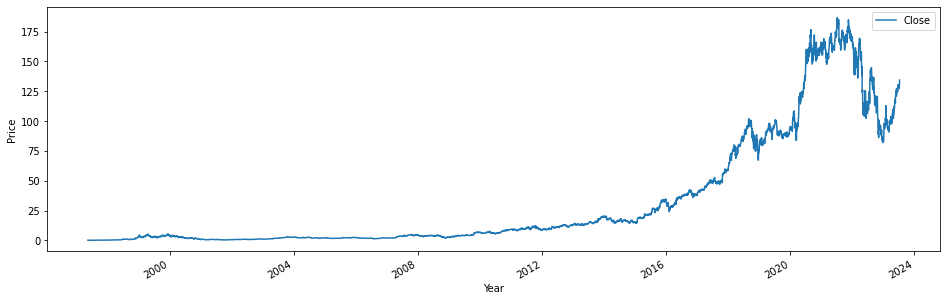

In [205]:
#Visualising Stock Closing Price since 2007
stock_data.plot.line(y=['Close'], use_index= True, figsize=(16,5), xlabel='Year', ylabel='Price')

## Preprocessing Data

In [206]:
#Removing irrelevant columns before Model Training - Dividends + Stock Splits
del stock_data['Dividends']
del stock_data['Stock Splits']
stock_data.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
1997-05-15 00:00:00-04:00,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000
1997-05-16 00:00:00-04:00,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000
1997-05-19 00:00:00-04:00,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000
1997-05-20 00:00:00-04:00,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000
1997-05-21 00:00:00-04:00,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000


### Creating Target Column

Target column = 1 if tomorrow's Closing Price (Tomorrow Column) is greater than today's closing price else 0. (Close Column)

In [207]:
stock_data["Tomorrow"] = stock_data["Close"].shift(-1)
stock_data

,Date,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,,
1997-05-15 00:00:00-04:00,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.086458
1997-05-16 00:00:00-04:00,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.085417
1997-05-19 00:00:00-04:00,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.081771
1997-05-20 00:00:00-04:00,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.071354
1997-05-21 00:00:00-04:00,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.069792
...,...,...,...,...,...,...,...
2023-07-07 00:00:00-04:00,2023-07-07 00:00:00-04:00,128.589996,130.970001,128.130005,129.779999,41928700,127.129997
2023-07-10 00:00:00-04:00,2023-07-10 00:00:00-04:00,129.070007,129.279999,125.919998,127.129997,61889300,128.779999
2023-07-11 00:00:00-04:00,2023-07-11 00:00:00-04:00,127.750000,129.770004,127.349998,128.779999,49951500,130.800003


In [208]:
stock_data["Target"] = (stock_data["Tomorrow"] > stock_data["Close"]).astype(int)
stock_data.head()

,Date,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,,
1997-05-15 00:00:00-04:00,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.086458,0
1997-05-16 00:00:00-04:00,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.085417,0
1997-05-19 00:00:00-04:00,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.081771,0
1997-05-20 00:00:00-04:00,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.071354,0
1997-05-21 00:00:00-04:00,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.069792,0


## Training the Model

In [209]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250, min_samples_split=100, random_state=1)

train = stock_data.iloc[:-820] #80% of data for training approx.
test = stock_data.iloc[-820:] #20% of data for testing approx.

predictors = ["Close", "Volume", "Open", "High", "Low"] #Valid Columns for training rfc model
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=250, random_state=1)

## Making Prediction from the RFC Model

In [210]:
#Predicting From the Trained Model
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index, name="Predictions")
preds, type(test.index)

(Date
 2020-04-09 00:00:00-04:00    0
 2020-04-13 00:00:00-04:00    0
 2020-04-14 00:00:00-04:00    0
 2020-04-15 00:00:00-04:00    0
 2020-04-16 00:00:00-04:00    0
                             ..
 2023-07-07 00:00:00-04:00    0
 2023-07-10 00:00:00-04:00    0
 2023-07-11 00:00:00-04:00    0
 2023-07-12 00:00:00-04:00    0
 2023-07-13 00:00:00-04:00    0
 Name: Predictions, Length: 820, dtype: int64,
 pandas.core.indexes.base.Index)

### Comparing Target (Actual) vs Predictions generated from rfc model

In [211]:
combined = pd.concat([test["Target"], preds], axis=1)
combined

,Target,Predictions
Date,,
2020-04-09 00:00:00-04:00,1,0
2020-04-13 00:00:00-04:00,1,0
2020-04-14 00:00:00-04:00,1,0
2020-04-15 00:00:00-04:00,1,0
2020-04-16 00:00:00-04:00,0,0
...,...,...
2023-07-07 00:00:00-04:00,0,0
2023-07-10 00:00:00-04:00,1,0
2023-07-11 00:00:00-04:00,1,0


### Bring the above steps altogether

In [212]:
def generate_predictions(data, model, predictors, start=820, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy() #splitting data into training data
        test = data.iloc[i:(i+step)].copy() #splitting data inot testing data
        model.fit(train[predictors], train["Target"]) #model fitting
        preds = model.predict(test[predictors]) #making predictions on the test data
        preds = pd.Series(preds, index=test.index, name="Predictions") 
        combined = pd.concat([test["Target"], preds], axis=1) #pd df for target (actual) vs predicted outcome
        all_predictions.append(combined)
    
    return pd.concat(all_predictions) # returns list of target (actual outcome) vs predictions from rfc model

In [213]:
predictions = generate_predictions(stock_data, model, predictors)
predictions

,Target,Predictions
Date,,
2000-08-15 00:00:00-04:00,1,0
2000-08-16 00:00:00-04:00,0,0
2000-08-17 00:00:00-04:00,1,0
2000-08-18 00:00:00-04:00,0,1
2000-08-21 00:00:00-04:00,0,0
...,...,...
2023-07-07 00:00:00-04:00,0,0
2023-07-10 00:00:00-04:00,1,0
2023-07-11 00:00:00-04:00,1,0


### Comparison for difference in predicted vs actual outcome

In [214]:
predictions["Predictions"].value_counts(),predictions["Target"].value_counts()

(0    3268
 1    2495
 Name: Predictions, dtype: int64,
 1    2951
 0    2812
 Name: Target, dtype: int64)

This shows bad performance.For more clarity, we can conduct precision scoring on this: 

In [215]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5130260521042084

## Conclusion

The precision score is quite low. This goes onto show the our rfc model does not perform well in predicting next day's price just from historical data. To resolve this, we can: 
1. Scrape more relevant data that realistically affects the stock prices. (Eg: Stock news)
2. Perform hyperparameter tuning